In [1]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt
import cvxpy as cp

# Formulations

In [8]:
# Problem Data (EE364a Engineering Everywhere Page; HW4 Q5)
A = np.array([[-1, 0.4, 0.8],
              [1, 0, 0],
              [0, 1, 0]])
B = np.array([[1, 0, 0.3]]).T
x_des = np.array([[7, 2, -6]]).T
T = 30
n = A.shape[0]
m = B.shape[1]

The fuel use actuator mapping is given by

$$ 
f(a) =
\begin{cases}
\left| a \right| & \left| a \right| \le 1 \\
2 \left| a \right| - 1 & \left| a \right| > 1
\end{cases}
$$

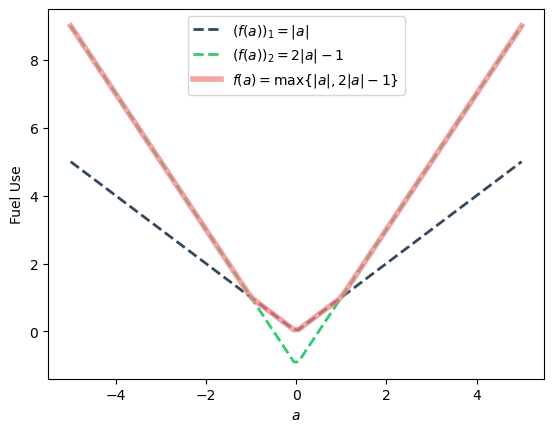

In [34]:
a = np.linspace(-5, 5, 100)
f1 = np.abs(a)
f2 = 2*np.abs(a) - 1
f3 = np.maximum(f1, f2)

plt.figure()

plt.plot(a, f1, label='$(f(a))_1 = |a|$', linestyle="--", color='#34495E', linewidth=2)
plt.plot(a, f2, label='$(f(a))_2 = 2|a| - 1$', color="#2ECC71", linestyle="--", linewidth=2)
plt.plot(a, f3, label='$f(a) = \max \{|a|, 2|a| - 1\}$', color="lightcoral", linewidth=4, alpha=0.7)

# plt.title('Actuator Fuel Use Map')
plt.xlabel('$a$')
plt.ylabel('Fuel Use')

plt.legend()

# plt.savefig('actuator_fuel-use.png', dpi=600, bbox_inches='tight')
plt.savefig('actuator_fuel-use.pdf', bbox_inches='tight')

plt.show()



# Convex Formulation Instantiation

In [15]:
x = cp.Variable((n, T+1))
u = cp.Variable((m, T))



f0 = cp.sum( [ cp.maximum( cp.abs(u[:, t]), 2*cp.abs(u[:, t]) - 1 ) for t in range(T)] )
obj = cp.Minimize(f0)

constr = [x[:, t+1] == A@x[:, t] + B@u[:, t] for t in range(T)]
constr += [x[:, 0] == np.zeros(n)]
constr += [ x[:, T] == x_des.flatten() ]

prob = cp.Problem(obj, constr)
prob.solve()

/Users/q3/opt/anaconda3/envs/boyd_linear-algebra/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


17.32356785683021

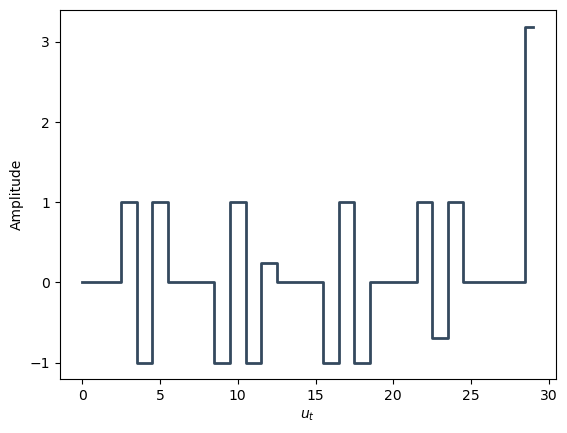

In [36]:
plt.figure()

plt.step(np.arange(T), u.value[0, :], where='mid', linestyle="-", color='#34495E', linewidth=2)

# plt.title('Minimum fuel actuator signal')
plt.xlabel('$u_t$')
plt.ylabel('Amplitude')

plt.savefig('4-16_min-fuel.pdf', bbox_inches='tight')

plt.show()

# LP Formulation Instantiation

In [26]:
x = cp.Variable((n, T+1))
u = cp.Variable((m, T))
t = cp.Variable(T)
y = cp.Variable(T)

obj = cp.Minimize(cp.sum(t))

constr = [x[:, t+1] == A@x[:, t] + B@u[:, t] for t in range(T)]
constr += [x[:, 0] == np.zeros(n), x[:, T] == x_des.flatten()]
constr += [ y <= t, 2*y - 1 <= t]
constr += [-y <= u.flatten(), u.flatten() <= y]

prob = cp.Problem(obj, constr)
prob.solve()


/Users/q3/opt/anaconda3/envs/boyd_linear-algebra/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


17.32356785494909

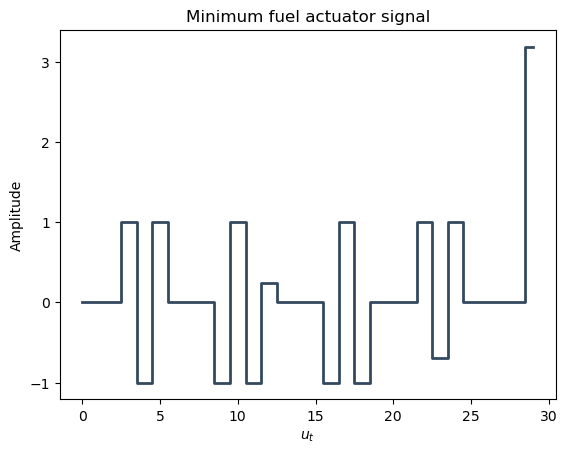

In [29]:
plt.figure()

plt.step(np.arange(T), u.value[0, :], where='mid', linestyle="-", color='#34495E', linewidth=2)

plt.title('Minimum fuel actuator signal')
plt.xlabel('$u_t$')
plt.ylabel('Amplitude')

plt.show()

I did try to instantiate the LP with the controllability matrix, but I was struggling to get this to work. $A^{T}$ did not contain unreasonably small values, so I'm guessing user error is to blame. I might come back to at a later time.